##Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('/content/most_subscribed_youtube_channels.csv')

In [3]:
dataset.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [4]:
dataset.tail()

,rank,Youtuber,subscribers,video views,video count,category,started
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012
999,1000,Dobre Brothers,"10,900,000","2,808,411,693",590,People & Blogs,2017


In [5]:
dataset.shape

(1000, 7)

In [6]:
dataset.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.isnull().sum()

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [10]:
dataset.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2012.376000
std,288.819436,3.998076
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [11]:
dataset.nunique()

rank           1000
Youtuber        999
subscribers     286
video views     991
video count     856
category         18
started          18
dtype: int64

In [12]:
dataset['category'].unique()

array(['Music', 'Film & Animation', 'Education', 'Shows', nan, 'Gaming',
       'Entertainment', 'People & Blogs', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [13]:
dataset['category'].value_counts()

Entertainment            241
Music                    222
People & Blogs           119
Gaming                   102
Comedy                    63
Film & Animation          52
Education                 46
Howto & Style             45
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Trailers                   2
Nonprofits & Activism      2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
Name: category, dtype: int64

##Exploratory data analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


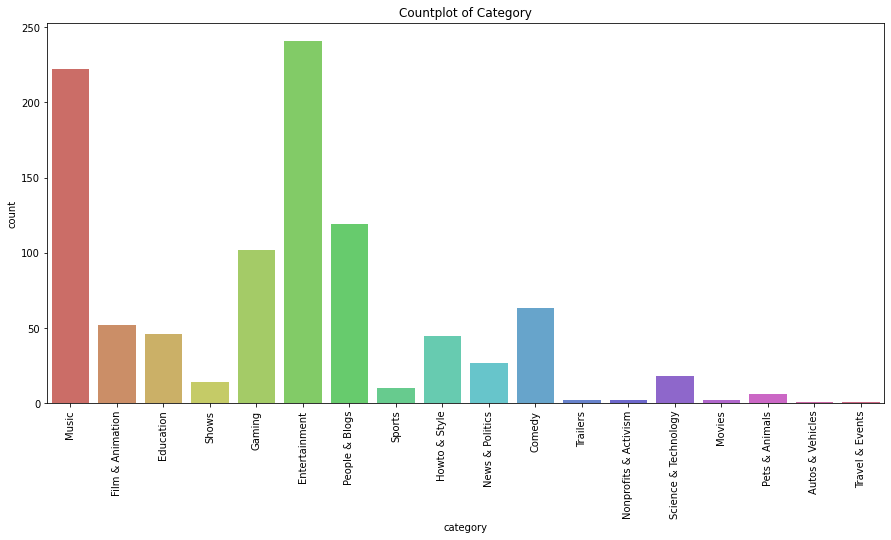

In [14]:
plt.figure(figsize=[15,7])
plt.title('Countplot of Category')
sns.countplot(dataset['category'],data=dataset,palette='hls')
plt.xticks(rotation=90)
plt.show()

The Entertainment category has the most YouTube channels, followed by Music.


In [15]:
import plotly.express as px

In [16]:
categories = dataset['category'].value_counts()
fig = px.pie(values = categories.values,
             names = categories.index,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title= 'Categories of youtube channels', template = 'presentation')
fig.update_traces(textposition='inside',
                  textfont_size=12,
                  textinfo='percent+label')
fig.show()

The Entertainment and Music category outnumber all others.

Text(0.5, 1.0, 'Started year of youtube channel')

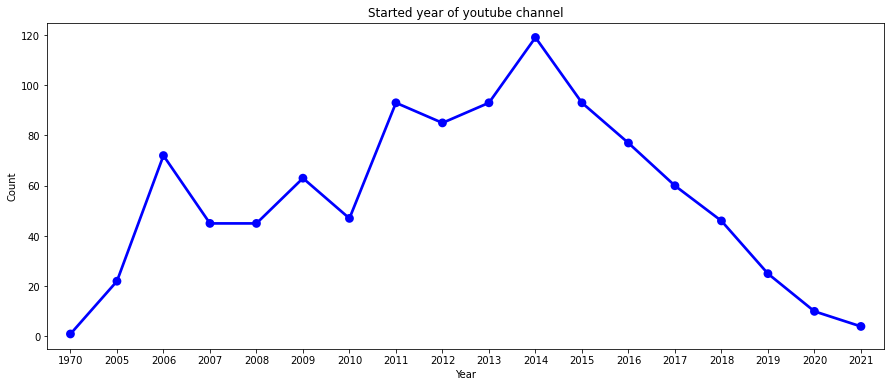

In [17]:
year = dataset['started'].value_counts()
plt.figure(figsize=(15,6))
sns.pointplot(x=year.index,y=year.values,color='blue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Started year of youtube channel')

In year 2014, total 120 youtube channels were started, which is highest in 5 decades.

In [18]:
dataset['video views']=dataset['video views'].str.replace(',','')
dataset['video count']=dataset['video count'].str.replace(',','')
dataset['subscribers']=dataset['subscribers'].str.replace(',','')
dataset['video views']=dataset['video views'].astype('int64')
dataset['video count']=dataset['video count'].astype('int64')
dataset['subscribers']=dataset['subscribers'].astype('int64')

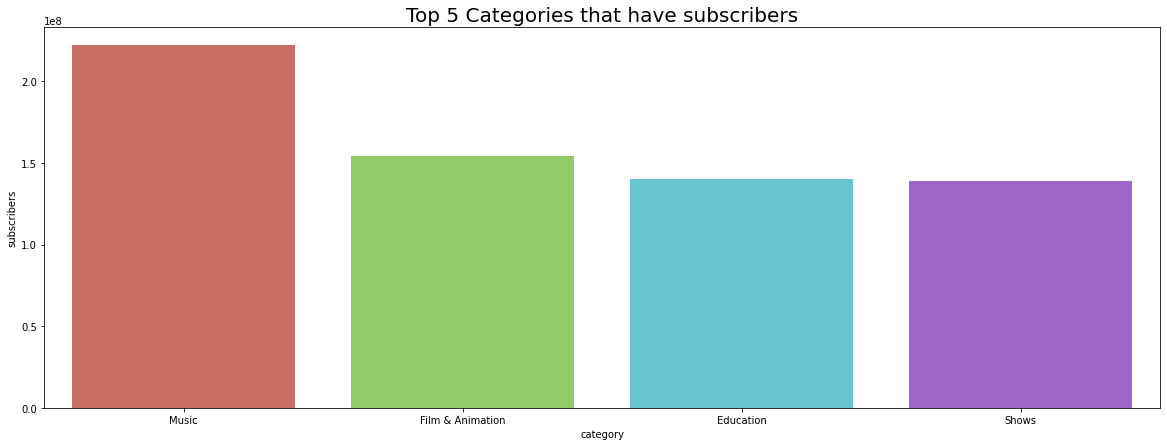

In [19]:
subscribers=dataset.sort_values('subscribers',ascending=False)
plt.figure(figsize=(20,7))
subscribers=subscribers[:5]
sns.barplot(x="category", y="subscribers", data=subscribers, palette="hls")
plt.title('Top 5 Categories that have subscribers',size=20);

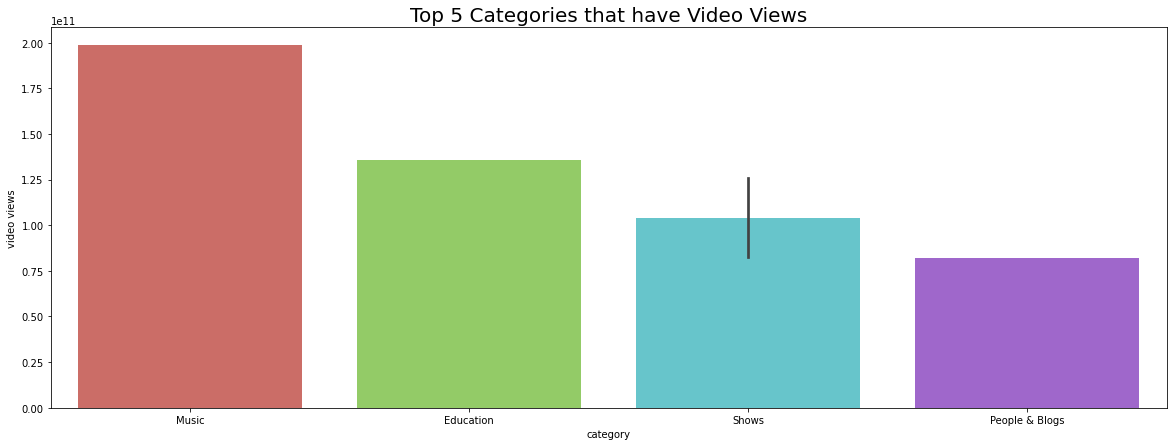

In [20]:
videoviews=dataset.sort_values('video views',ascending=False)
plt.figure(figsize=(20,7))
videoviews=videoviews[:5]
sns.barplot(x="category", y="video views", data=videoviews, palette="hls")
plt.title('Top 5 Categories that have Video Views',size=20);

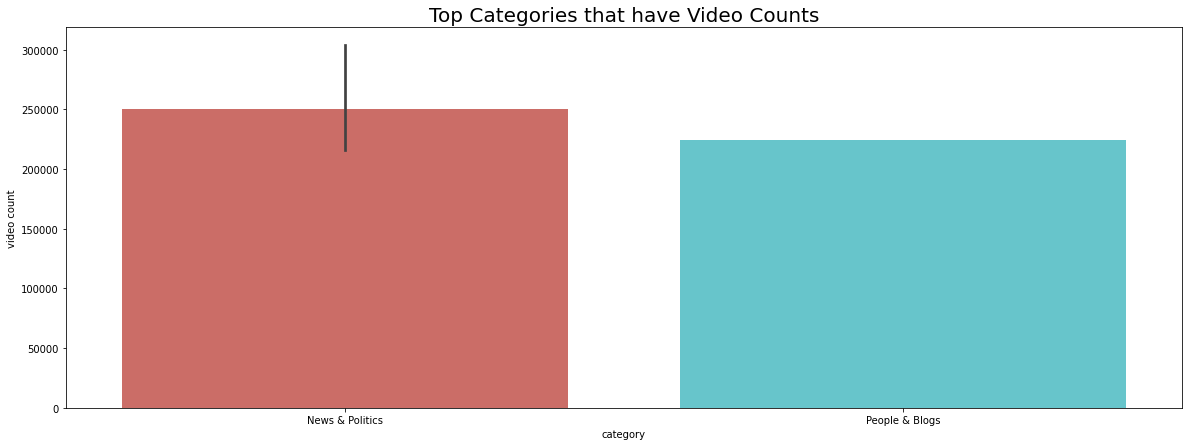

In [21]:
videocount=dataset.sort_values('video count',ascending=False)
plt.figure(figsize=(20,7))
videocount=videocount[:5]
sns.barplot(x="category", y="video count", data=videocount, palette="hls") 
plt.title('Top Categories that have Video Counts',size=20);

##Pairplot

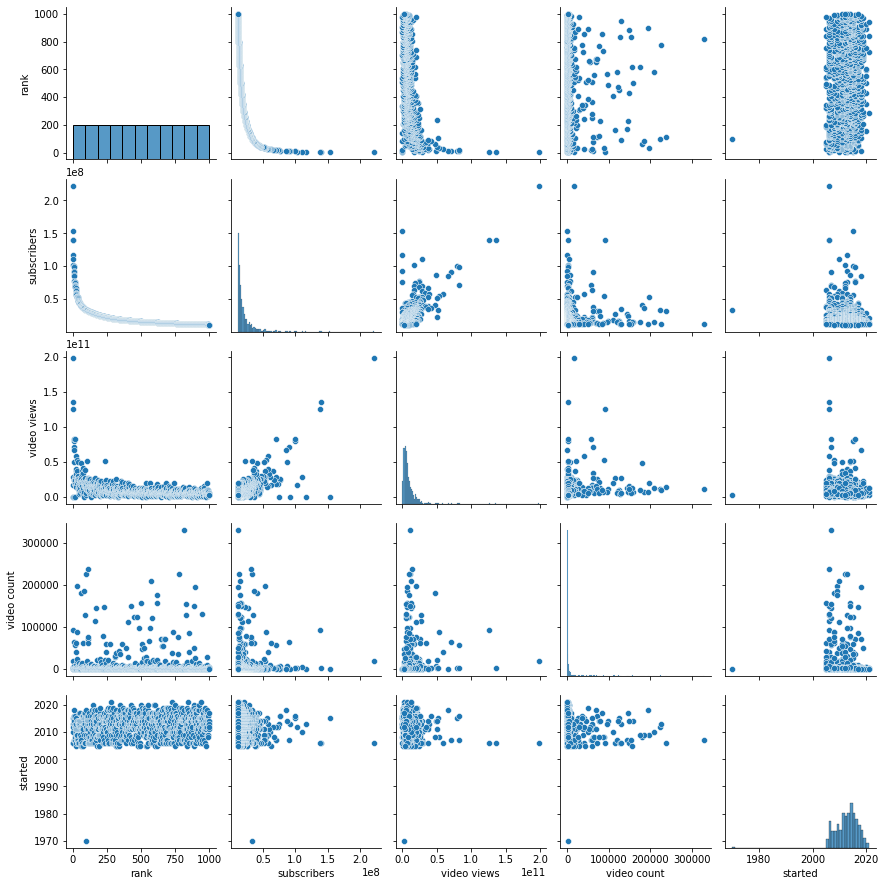

In [22]:
sns.pairplot(dataset)
plt.show()

##Heatmap

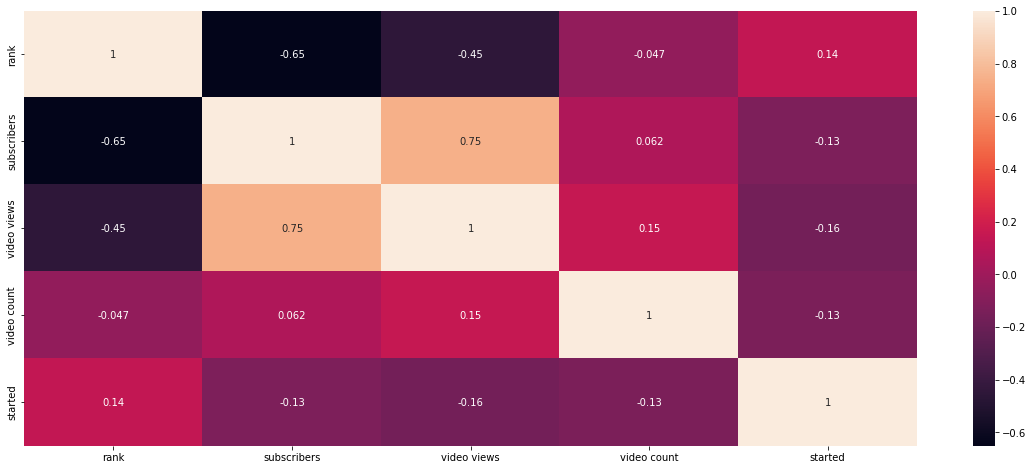

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()